<a href="https://colab.research.google.com/github/Akashkumarashu/data-science-project/blob/main/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205687,ZWE,Africa,Zimbabwe,28-07-2022,256336.0,21.0,17.000,5576.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205688,ZWE,Africa,Zimbabwe,29-07-2022,256376.0,40.0,22.714,5577.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205689,ZWE,Africa,Zimbabwe,30-07-2022,256376.0,0.0,18.571,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
205690,ZWE,Africa,Zimbabwe,31-07-2022,256378.0,2.0,17.714,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df["excess_mortality_cumulative_absolute"].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
205687   NaN
205688   NaN
205689   NaN
205690   NaN
205691   NaN
Name: excess_mortality_cumulative_absolute, Length: 205692, dtype: float64>

In [ ]:
df.drop(["excess_mortality_cumulative_absolute"],axis=1,inplace=True)

In [ ]:
pd.unique(df["continent"])

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
df["excess_mortality"].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
205687   NaN
205688   NaN
205689   NaN
205690   NaN
205691   NaN
Name: excess_mortality, Length: 205692, dtype: float64>

In [ ]:
df.dropna(subset=["continent"],axis =0,inplace=True)

In [ ]:
pd.unique(df["continent"])

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
df.drop(["excess_mortality_cumulative"],axis=1,inplace=True)


In [ ]:
df.rename(columns={"location":"country"},inplace=True)
df

,iso_code,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205687,ZWE,Africa,Zimbabwe,28-07-2022,256336.0,21.0,17.000,5576.0,2.0,0.857,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN
205688,ZWE,Africa,Zimbabwe,29-07-2022,256376.0,40.0,22.714,5577.0,1.0,1.000,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN
205689,ZWE,Africa,Zimbabwe,30-07-2022,256376.0,0.0,18.571,5577.0,0.0,0.714,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN
205690,ZWE,Africa,Zimbabwe,31-07-2022,256378.0,2.0,17.714,5577.0,0.0,0.714,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN


In [ ]:
df["female_smokers"].replace(np.NaN,"Unknown",inplace=True)
df

,iso_code,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,597.029,9.59,Unknown,NaN,37.746,0.5,64.83,0.511,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,Unknown,NaN,37.746,0.5,64.83,0.511,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,Unknown,NaN,37.746,0.5,64.83,0.511,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,Unknown,NaN,37.746,0.5,64.83,0.511,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,Unknown,NaN,37.746,0.5,64.83,0.511,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205687,ZWE,Africa,Zimbabwe,28-07-2022,256336.0,21.0,17.000,5576.0,2.0,0.857,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN
205688,ZWE,Africa,Zimbabwe,29-07-2022,256376.0,40.0,22.714,5577.0,1.0,1.000,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN
205689,ZWE,Africa,Zimbabwe,30-07-2022,256376.0,0.0,18.571,5577.0,0.0,0.714,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN
205690,ZWE,Africa,Zimbabwe,31-07-2022,256378.0,2.0,17.714,5577.0,0.0,0.714,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN


In [ ]:
df['male_smokers'].replace(np.NaN,"unknown",inplace=True)


In [ ]:
df2=df.groupby(["country"])[["country","total_cases","total_deaths"]].sum().reset_index()

<ipython-input-64-a27c6683b84e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby(["country"])[["country","total_cases","total_deaths"]].sum().reset_index()


In [ ]:
df2

,country,total_cases,total_deaths
0,Afghanistan,85422289.0,3698919.0
1,Albania,112569855.0,1695557.0
2,Algeria,123166123.0,3387623.0
3,Andorra,14220487.0,92260.0
4,Angola,37151736.0,808801.0
...,...,...,...
226,Wallis and Futuna,230521.0,3381.0
227,Western Sahara,0.0,0.0
228,Yemen,5253237.0,1040786.0
229,Zambia,122157751.0,1746028.0


In [ ]:
import matplotlib.pyplot as plt


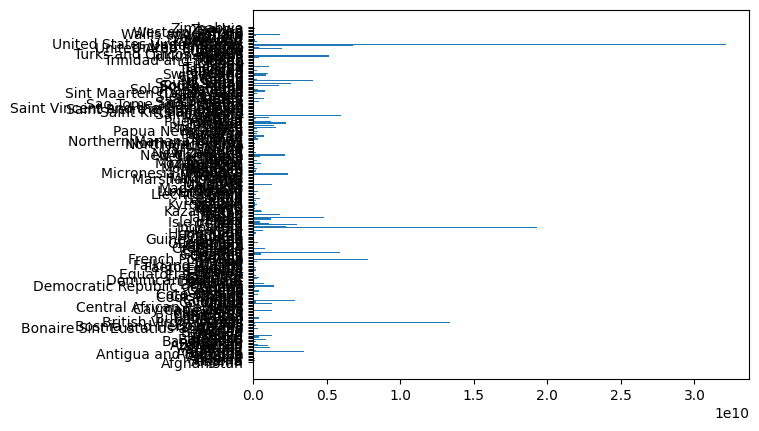

In [ ]:
plt.barh(df2["country"], df2["total_cases"])
plt.show()

In [ ]:
plt.barh(df["location"], df2["total_cases"])
plt.show()

KeyError: ignored